# Image processing

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.signal import convolve2d

from IPython.display import Image
from scipy import misc

imageSize = 8

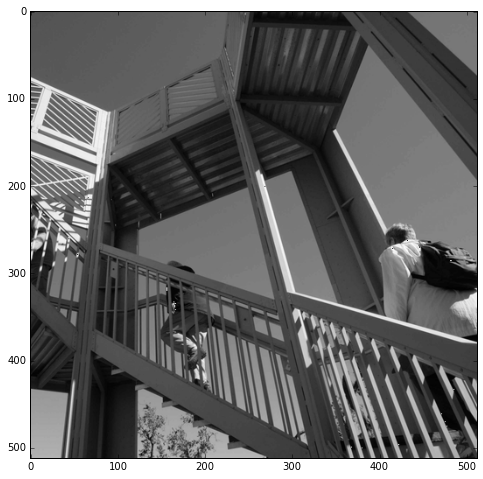

In [6]:
ascent = misc.ascent()
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(ascent, cmap=plt.cm.gray)

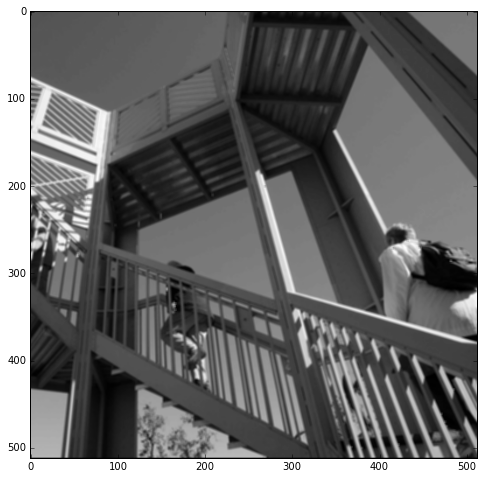

In [7]:
meanConv = np.ones((3,3))*1.0/9
Y = convolve2d(ascent, meanConv, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)


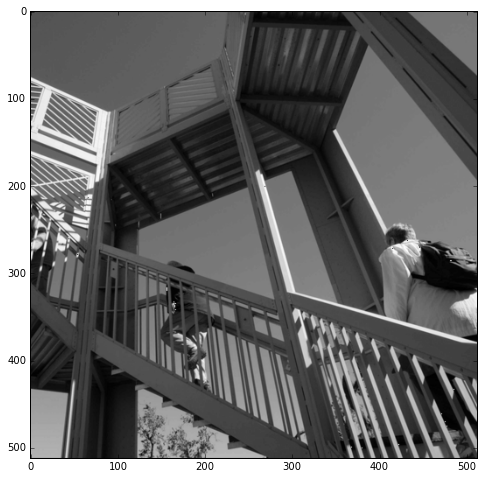

In [8]:
sharpConv = np.array([0,1,0,1,15,1,0,1,0])
sharpConv.shape = (3,3)
Y = convolve2d(ascent, sharpConv, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)

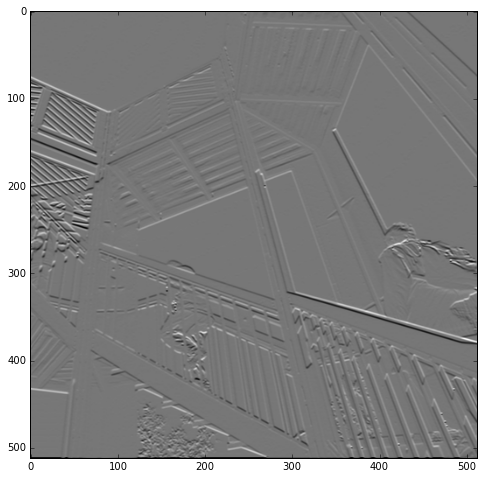

In [9]:
contrastConvHZ = np.array([1,2,1,0,0,0,-1,-2,-1])
contrastConvHZ.shape = (3,3)
Y = convolve2d(ascent, contrastConvHZ, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)

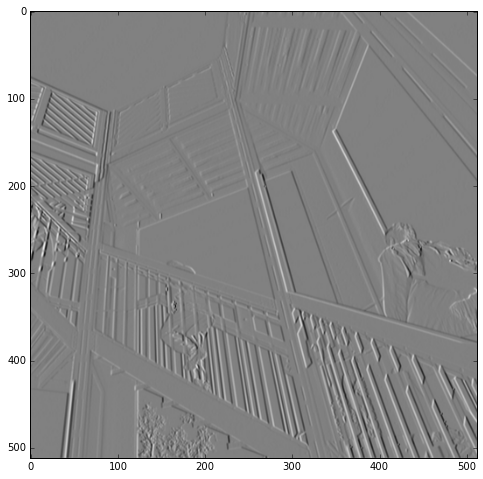

In [10]:
contrastConvVT = contrastConvHZ.transpose() #np.array([1,0,-1,2,0,-2,1,0,-1])
contrastConvVT.shape = (3,3)
Y = convolve2d(ascent, contrastConvVT, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)

## Same thing on color image

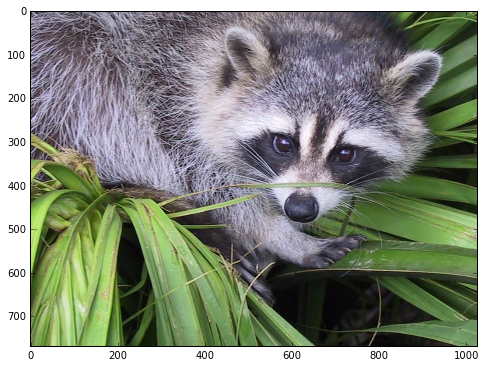

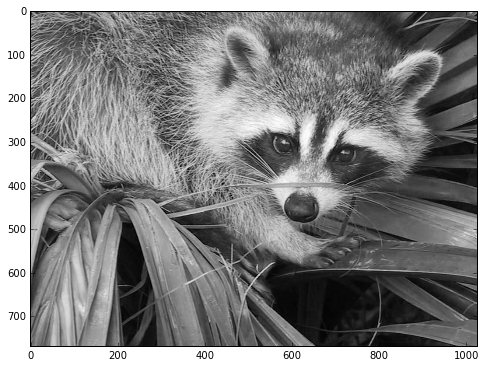

In [11]:
face = misc.face()
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

red = face[:,:,0]
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(red, cmap=plt.cm.gray)
plt.show()


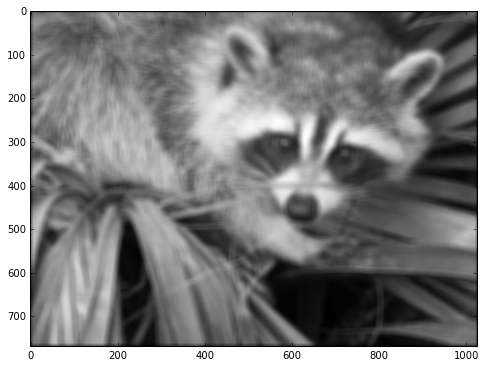

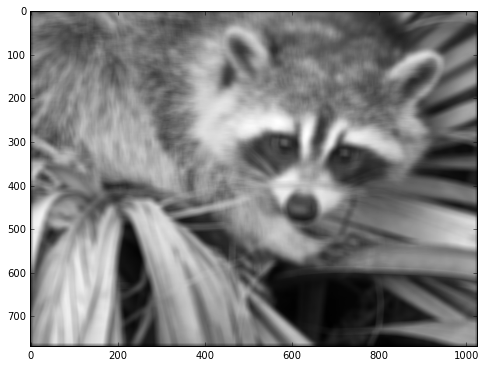

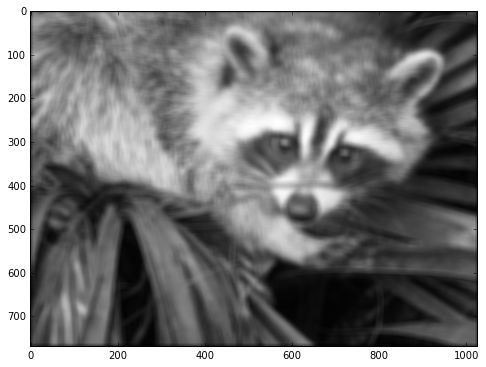

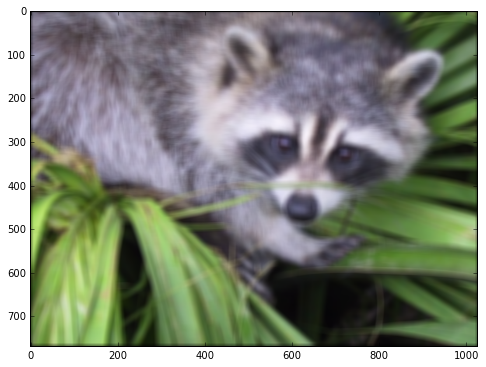

In [14]:
face = misc.face()
meanConv = np.ones((16,16))*1.0/256
#RED Channel
red = face[:,:,0]
YR = convolve2d(red, meanConv, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(YR, cmap=plt.cm.gray)
plt.show()
face[:,:,0] = YR

#GREEN Channel
green = face[:,:,1]
YG = convolve2d(green, meanConv, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(YG, cmap=plt.cm.gray)
plt.show()
face[:,:,1] = YG


#BLUE Channel
blue = face[:,:,2]
YB = convolve2d(blue, meanConv, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(YB, cmap=plt.cm.gray)
plt.show()
face[:,:,2] = YB



plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(face, cmap=plt.cm.gray)
plt.show()


In [35]:
hipassfilter = np.array([0,-1,0,-1,5,-1,0,-1,0])
hipassfilter.shape = ((3,3))

hipassfilter = np.array([0, 0,-1, 0, 0,
                         0,-1,-3,-1, 0,
                         -1,-3,20,-3,-1,
                         0,-1,-3,-1, 0,
                         0, 0,-1, 0, 0])

hipassfilter.shape = ((5,5))


lopassfilter = np.array([1,1,1,1,4,1,1,1,1])
lopassfilter.shape = ((3,3))

lopassfilter = np.array([0,1,1,1,0,
                         1,1,1,1,1,
                         1,1,2,1,1,
                         1,1,1,1,1,
                         0,1,1,1,0])
lopassfilter.shape = ((5,5))

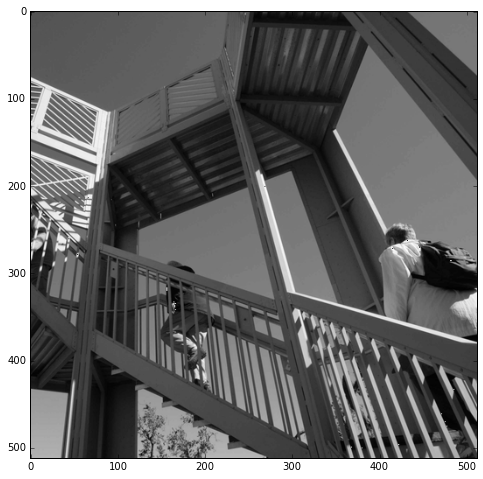

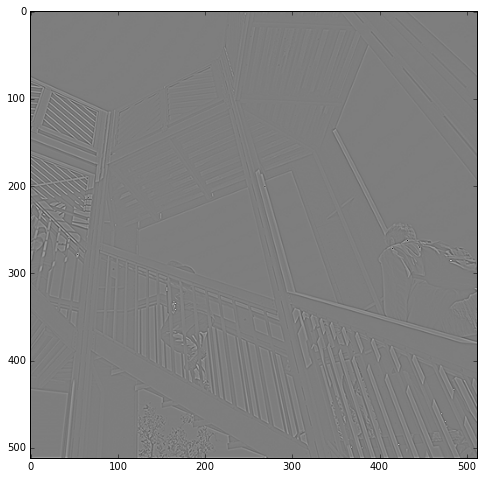

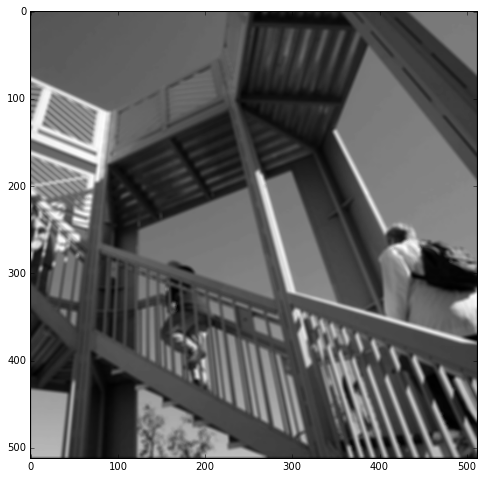

In [36]:
ascent = misc.ascent()
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(ascent, cmap=plt.cm.gray)
plt.show()
Y = convolve2d(ascent, hipassfilter, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)
plt.show()
Y = convolve2d(ascent, lopassfilter, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)
plt.show()


## Gradient Filter
from [http://xmcvs.free.fr/astroart/Chapitre4.pdf]

In [55]:
gradientfilter = np.array([-1,-1,-1,1,1,1,0,0,0])
gradientfilter.shape = ((3,3))

sobelfilter = np.array([-3,-9,-3,0,0,0,3,9,3])
#sobelfilter = np.array([0,-9,0,0,0,0,0,9,0])
sobelfilter.shape =((3,3))

gaussianBlur = np.array([
                        0, 0.6, 1.7, 0.6, 0,
                        0.6, 13, 36, 13, 0.6,
                        1.7,36,100,36,1.7,
                        0.6, 13, 36, 13, 0.6,
                        0, 0.6, 1.7, 0.6, 0,
    ])

gaussianBlur.shape = ((5,5))

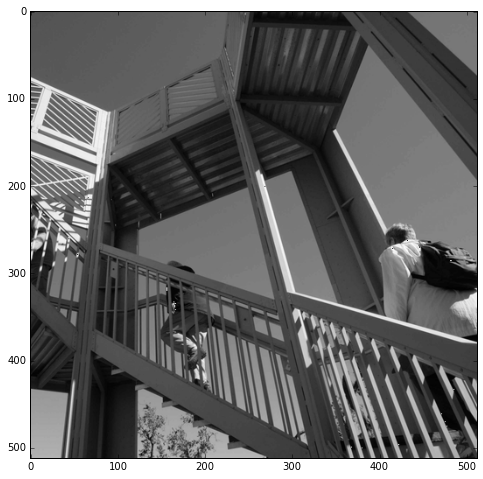

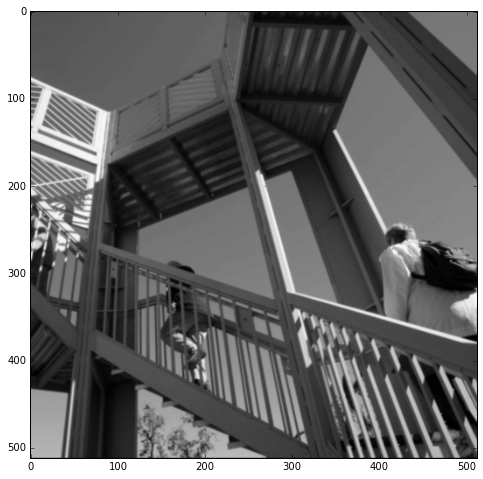

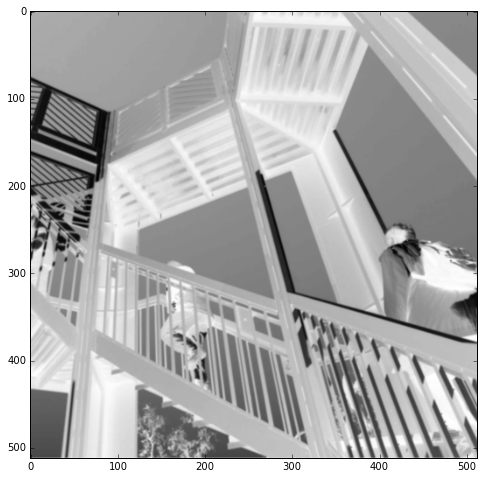

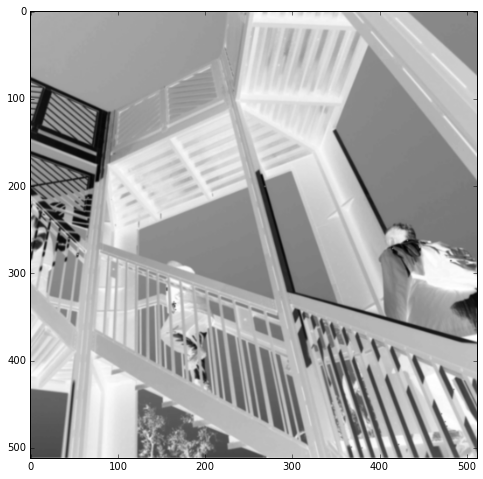

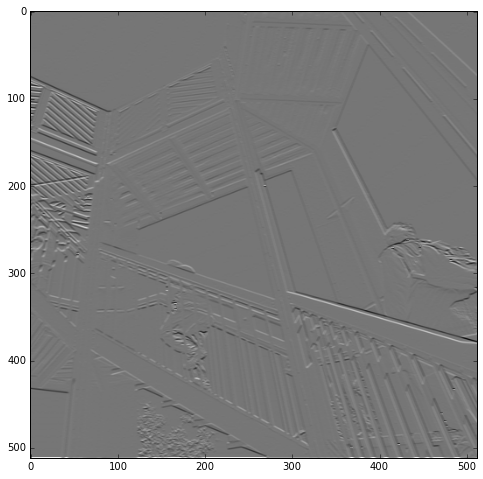

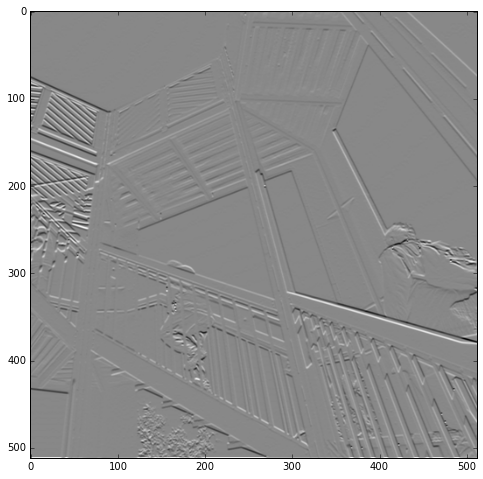

In [59]:
ascent = misc.ascent()
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(ascent, cmap=plt.cm.gray)
plt.show()
Y = convolve2d(ascent, gaussianBlur, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)
plt.show()

# subtract gaussian from original (unsharp mask)
Y2 = ascent - Y
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y2, cmap=plt.cm.gray)
plt.show()

# add unsharp to original
Y3 = ascent + Y2*3
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y3, cmap=plt.cm.gray)
plt.show()

Y = convolve2d(ascent, gradientfilter, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)
plt.show()
Y = convolve2d(ascent, sobelfilter, True)
plt.figure(1, figsize = (imageSize,imageSize))
plt.imshow(Y, cmap=plt.cm.gray)
plt.show()